# testing

### imports

In [11]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal

# interpolation because ARDUINO data is spaced unevenly
import scipy.interpolate as interpolate

# save data
import pickle

### load `data` from .mat file and split into `params` and `response`

In [8]:
mat_dict = io.loadmat('./Chandler/Training_phase1/ToneDisc_ANChandler_p1_d1.mat')

data = mat_dict['data'][0][0]
params = data[0][0][0]
response = data[1][0][0]

### get `dataArduino` (ARDUINO data) and `respMTX` (trials) from response, `get MTXTrialType` from params

In [9]:
dataArduino = response[0]
print("dataArduino shape: "+str(dataArduino.shape))
respMTX = response[2]
print("respMTX shape: "+str(respMTX.shape))

MTXTrialType = params[16]
print("MTXTrialType shape: "+str(MTXTrialType.shape))

num_trials = respMTX.shape[0]
print("number of trials: "+str(num_trials))

dataArduino shape: (229399, 7)
respMTX shape: (112, 7)
MTXTrialType shape: (1000, 5)
number of trials: 112


preview trials

In [10]:
np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})
print(respMTX)

[[3.486941 4.234861 1.000000 7.507225 -2.410800 0.000000 1.000000]
 [13.830097 nan nan 14.453972 -2.401000 1.000000 nan]
 [16.745678 17.452063 1.000000 18.663083 -2.494100 0.000000 1.000000]
 [25.572283 nan nan 26.503163 -2.249100 1.000000 nan]
 [28.196570 28.755291 1.000000 29.657218 -2.288300 0.000000 1.000000]
 [36.221121 36.880009 1.000000 40.963986 -2.386300 0.000000 1.000000]
 [55.213248 nan nan 55.421869 -2.454900 1.000000 nan]
 [60.990274 61.675817 1.000000 66.495173 -2.396100 0.000000 1.000000]
 [71.448605 71.974415 1.000000 72.635005 -2.376500 0.000000 1.000000]
 [76.978006 77.786194 1.000000 80.266626 -2.337300 0.000000 1.000000]
 [89.646523 nan nan 90.081210 -2.307900 1.000000 nan]
 [94.266099 94.737816 1.000000 94.932197 -2.435300 0.000000 1.000000]
 [101.367526 101.745299 1.000000 102.004583 -2.538200 0.000000 1.000000]
 [118.090317 119.025996 1.000000 126.861631 -2.503900 0.000000 1.000000]
 [131.004954 nan nan 131.452035 -2.533300 1.000000 nan]
 [134.282260 134.937356 1

### test

In [ ]:
for trial_i in range(0, num_trials):
    trial_respMTX = respMTX[trial_i]

    tone_t = trial_respMTX[1]
    lever_press_t = trial_respMTX[3]
    rxn_t = lever_press_t - tone_t
    

### Look at an individual trial specific data `trail_respMTX`, `trial_dataArduino`, and `trial_MTXTrialType`. Plot 5s of the trial

In [16]:
trial_i = 1
trial_respMTX = respMTX[trial_i]

start_t = respMTX[trial_i][0]
end_t = respMTX[trial_i+1][0]

for arduino_i, arduino_t in enumerate(dataArduino[:, 0]):
    if start_t <= arduino_t:
        start_arduino_i = arduino_i
        break

for arduino_i, arduino_t in enumerate(dataArduino[:, 0]):
    if end_t <= arduino_t:
        end_arduino_i = arduino_i
        break

for arduino_i, arduino_t in enumerate(dataArduino[:, 0]):
    if start_t + 5 <= arduino_t:
        endpress_arduino_i = arduino_i
        break

trial_dataArduino = dataArduino[start_arduino_i:end_arduino_i,:]
trialpress_dataArduino = dataArduino[start_arduino_i:endpress_arduino_i,:]

trial_MTXTrialType = MTXTrialType[trial_i, :]

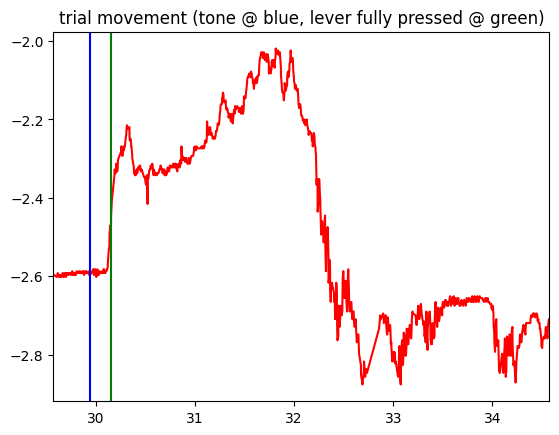

In [17]:
# plot lever movement across trial
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.axvline(x = trial_respMTX[1], color = 'b')
plt.title("trial movement (tone @ blue, lever fully pressed @ green)")
plt.axvline(x = trial_respMTX[3], color = 'g')
plt.xlim((start_t, start_t+5))
plt.show()


### Look at sampling rate

In [151]:
dts = []
old_arduino_t = dataArduino[start_arduino_i, 0]
for arduino_t in dataArduino[start_arduino_i+1:end_arduino_i, 0]:
    dts.append(arduino_t - old_arduino_t)
    old_arduino_t = arduino_t

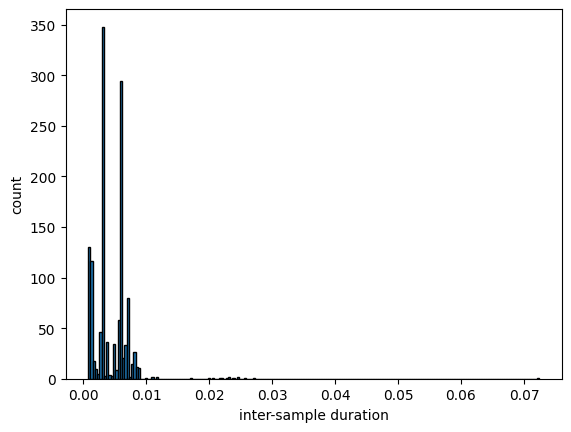

mean: 0.0044238993993994
std: 0.0034103880990198642


In [152]:
# plotting histogram of dataArduino inter-sample durations
plt.hist(dts, bins=200, edgecolor='black')
plt.xlabel('inter-sample duration')
plt.ylabel('count')
plt.show()

# print out mean and std
print("mean: " + str(sum(dts) / len(dts)))
print("std: " + str(statistics.stdev(dts)))

In [168]:
1/(0.0044238993993994+ (3*0.0034103880990198642))

68.23580031532879

### spline interpolation
for unevenly spaced data

In [99]:
new_fs = 1000
f = interpolate.interp1d(trial_dataArduino[:, 0], trial_dataArduino[:, 1], kind='slinear')
interpol_start_t = int(np.ceil(min(trial_dataArduino[:,0])))
interpol_end_t = int(np.floor(max(trial_dataArduino[:,0])))
num_samples = new_fs*(interpol_end_t-interpol_start_t)
newx = np.linspace(interpol_start_t, interpol_end_t, num_samples)
newy = f(newx)

In [103]:
print("avg original freq in trial: "+str(1/0.005))
print("new interpolated freq: "+str(num_samples/(interpol_end_t - interpol_start_t)))

avg original freq in trial: 200.0
new interpolated freq: 1000.0


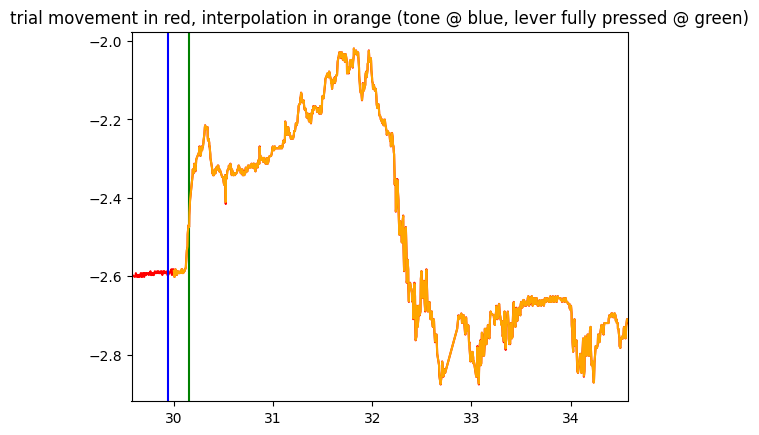

In [104]:
# plot lever movement and interpolation across trial
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.axvline(x = trial_respMTX[1], color = 'b')
plt.title("trial movement in red, interpolation in orange (tone @ blue, lever fully pressed @ green)")
plt.axvline(x = trial_respMTX[3], color = 'g')
plt.xlim((start_t, start_t+5))
plt.plot(newx, newy, 'orange')
plt.show()


### Lomb-Scargle periodogram

because we have uneven sampling (can't do FFT)

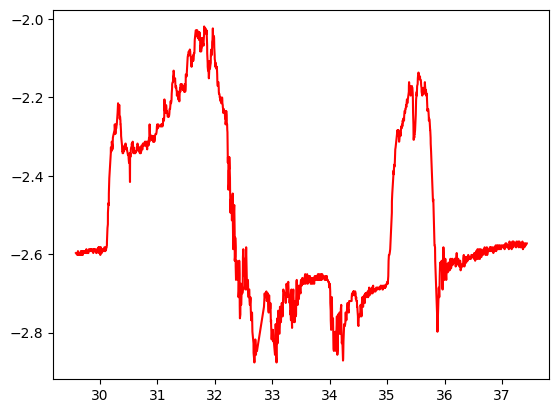

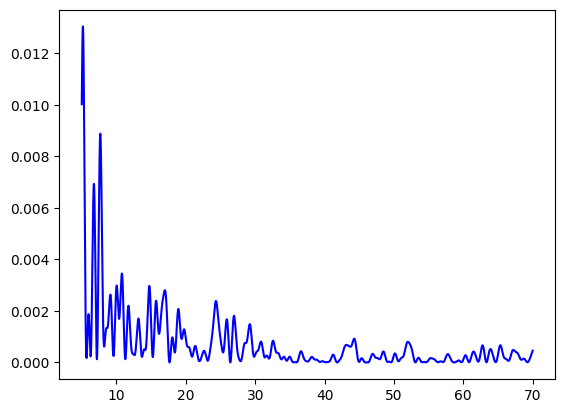

In [18]:
nout = 100000
freqs_to_test = np.linspace(5, 70, nout)
pgram = signal.lombscargle(trial_dataArduino[:, 0], trial_dataArduino[:, 1], freqs_to_test, normalize=True)
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.show()
plt.plot(freqs_to_test, pgram, 'blue')
plt.show()

### low pass filter to filter out sensor noise

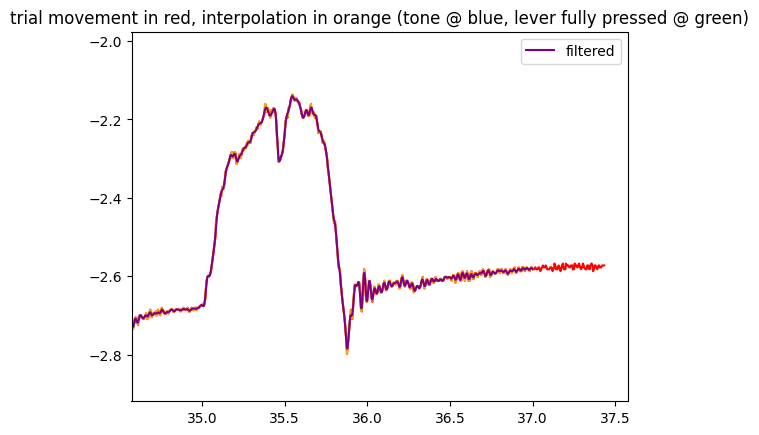

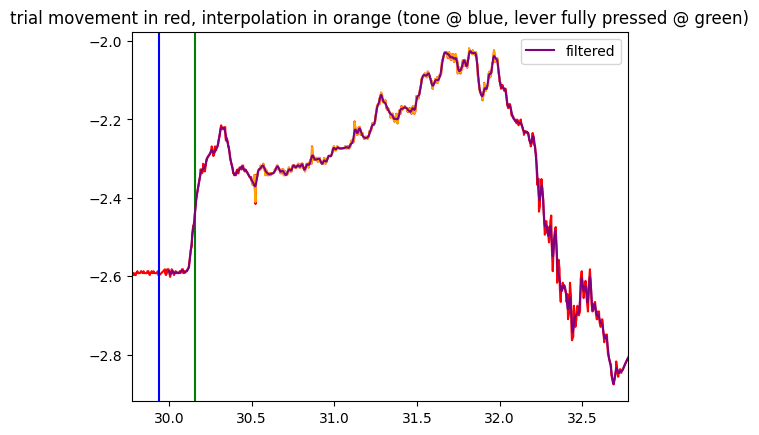

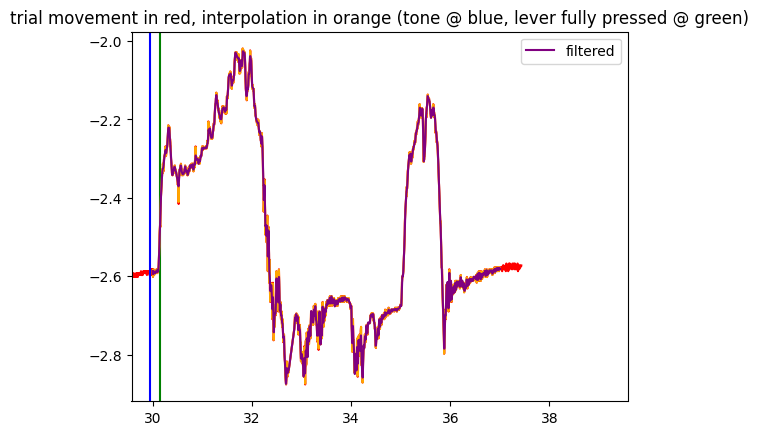

In [179]:
fc = 40  # Cut-off frequency of the filter
wn = fc / (new_fs / 2) # Normalize the frequency
b, a = signal.butter(6, wn, 'lowpass')
output = signal.filtfilt(b, a, newy)

# plot lever movement and interpolation across trial
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.axvline(x = trial_respMTX[1], color = 'b')
plt.title("trial movement in red, interpolation in orange (tone @ blue, lever fully pressed @ green)")
plt.axvline(x = trial_respMTX[3], color = 'g')
plt.xlim((start_t+5, start_t+8))
plt.plot(newx, newy, 'orange')
plt.plot(newx, output, label='filtered', color='purple')
plt.legend()
plt.show()

# plot lever movement and interpolation across trial
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.axvline(x = trial_respMTX[1], color = 'b')
plt.title("trial movement in red, interpolation in orange (tone @ blue, lever fully pressed @ green)")
plt.axvline(x = trial_respMTX[3], color = 'g')
plt.xlim((start_t+0.2, start_t+3.2))
plt.plot(newx[500:2000], newy[500:2000], 'orange')
plt.plot(newx, output, label='filtered', color='purple')
plt.legend()
plt.show()

# plot lever movement and interpolation across trial
plt.plot(trial_dataArduino[:, 0], trial_dataArduino[:, 1], 'red')
plt.axvline(x = trial_respMTX[1], color = 'b')
plt.title("trial movement in red, interpolation in orange (tone @ blue, lever fully pressed @ green)")
plt.axvline(x = trial_respMTX[3], color = 'g')
plt.xlim((start_t, start_t+10))
plt.plot(newx, newy, 'orange')
plt.plot(newx, output, label='filtered', color='purple')
plt.legend()
plt.show()

### FFT 

(-10.0, 100.0)

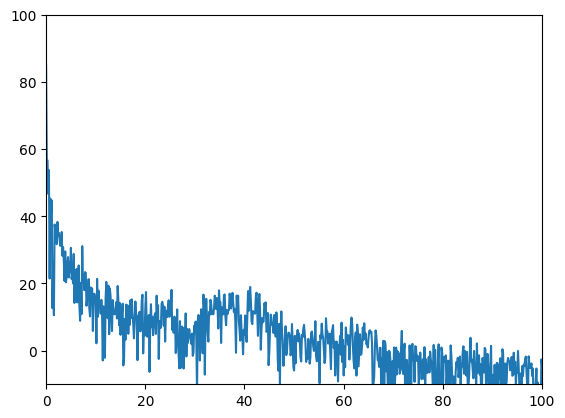

In [178]:
import numpy as np
import pylab as pl
rate = 1000
t = np.arange(0, 10, 1/rate)
p = 20*np.log10(np.abs(np.fft.rfft(newy))) #[500:2000]
f = np.linspace(0, rate/2, len(p))
plt.plot(f, p)
plt.xlim((0, 100))
plt.ylim((-10, 100))

### Kalman filter

In [201]:
!pip3 install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 4.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=8c4c4072cb3267c777fd7287fc944fc8dad37a34b67aa5f68949089fc6d05bf0
  Stored in directory: /Users/paulazhu/Library/Caches/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


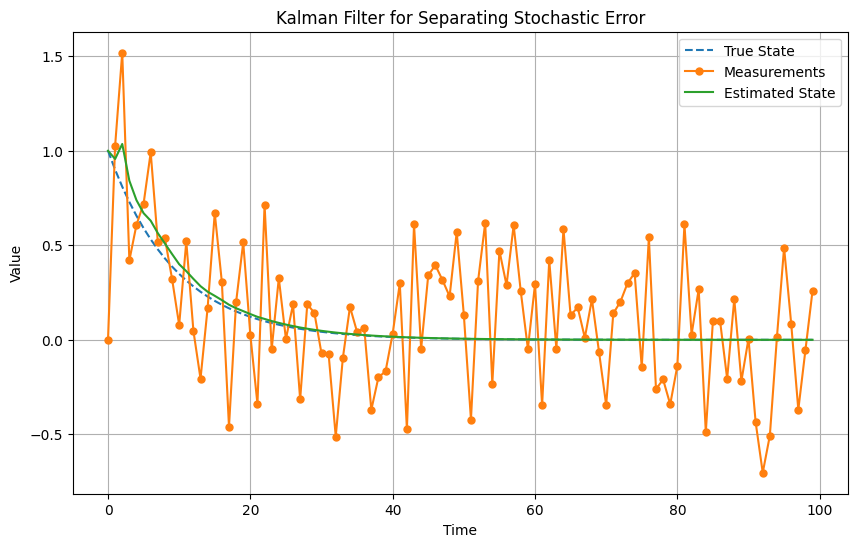

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

# Define the parameters of the hidden continuous system
A = 0.9  # State transition matrix
H = 1.0  # Observation matrix
Q = 0.0  # Process noise covariance
R = 0.1  # Measurement noise covariance
initial_state = 1  # Initial state

# Simulate the hidden continuous system
np.random.seed(0)
num_samples = 100
true_state = np.zeros(num_samples)
true_state[0] = initial_state
measurements = np.zeros(num_samples)
for t in range(1, num_samples):
    true_state[t] = A * true_state[t - 1] + np.random.normal(0, np.sqrt(Q))
    measurements[t] = H * true_state[t] + np.random.normal(0, np.sqrt(R))

# Kalman Filter to estimate the hidden state
state_estimate = np.zeros(num_samples)
state_covariance = np.zeros(num_samples)
state_estimate[0] = initial_state
state_covariance[0] = 0.1  # Initial state covariance

for t in range(1, num_samples):
    # Prediction step
    state_prediction = A * state_estimate[t - 1]
    covariance_prediction = A * state_covariance[t - 1] * A + Q
    
    # Update step
    kalman_gain = covariance_prediction * H / (H * covariance_prediction * H + R)
    state_estimate[t] = state_prediction + kalman_gain * (measurements[t] - H * state_prediction)
    state_covariance[t] = (1 - kalman_gain * H) * covariance_prediction

# Plot the true state, measurements, and estimated state
plt.figure(figsize=(10, 6))
plt.plot(range(num_samples), true_state, label="True State", linestyle="--")
plt.plot(range(num_samples), measurements, label="Measurements", marker="o", markersize=5)
plt.plot(range(num_samples), state_estimate, label="Estimated State")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Kalman Filter for Separating Stochastic Error")
plt.legend()
plt.grid(True)
plt.show()


### Approximate entropy

In [213]:
import numpy as np

def approximate_entropy(time_series, m, r):
    N = len(time_series)
    
    def pattern_count(X, m):
        count = 0
        for i in range(N - m + 1):
            pattern = X[i:i + m]
            for j in range(i + 1, N - m + 1):
                if np.max(np.abs(pattern - X[j:j + m])) <= r:
                    count += 1
        return count
    
    Cm = pattern_count(time_series, m)
    Cmp1 = pattern_count(time_series, m + 1)
    
    ApEn = -np.log(Cm / (N - m + 1)) + np.log(Cmp1 / (N - m))
    
    return ApEn

# Example usage:
time_series = np.array([1.1, 1.2, 1.15, 1.3, 1.25, 1.4, 1.35, 1.5])
m = 2  # Embedding dimension
r = 0.1 * np.std(time_series)  # Similarity tolerance
apen_value = approximate_entropy(time_series, m, r)
print("Approximate Entropy (ApEn):", apen_value)


Approximate Entropy (ApEn): nan


/var/folders/r7/8qfxhsfs03nbp3j_6k4vgz600000gn/T/ipykernel_9537/2408495432.py:18: RuntimeWarning: divide by zero encountered in log
  ApEn = -np.log(Cm / (N - m + 1)) + np.log(Cmp1 / (N - m))
/var/folders/r7/8qfxhsfs03nbp3j_6k4vgz600000gn/T/ipykernel_9537/2408495432.py:18: RuntimeWarning: invalid value encountered in scalar add
  ApEn = -np.log(Cm / (N - m + 1)) + np.log(Cmp1 / (N - m))


### EMD

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a nonlinear time series (example)
t = np.linspace(0, 1, 1000)
signal = np.sin(10 * np.pi * t) + np.sin(2 * np.pi * t) + np.random.normal(0, 0.2, t.shape)

# Define a stopping criterion for EMD
def stopping_criterion(imf):
    # You can customize this criterion based on your data
    return np.max(imf) < 0.01 * np.abs(imf).max()

# Function to perform one iteration of EMD
def extract_one_imf(signal):
    imf = signal.copy()
    while not stopping_criterion(imf):
        upper_envelope = get_upper_envelope(imf)
        lower_envelope = get_lower_envelope(imf)
        mean_envelope = 0.5 * (upper_envelope + lower_envelope)
        imf = imf - mean_envelope
    return imf

# Function to obtain upper envelope
def get_upper_envelope(signal):
    upper_envelope = []
    max_idx = np.argmax(signal)
    left_idx = max_idx
    right_idx = max_idx

    while left_idx > 0 and right_idx < len(signal) - 1:
        if signal[left_idx - 1] < signal[right_idx + 1]:
            right_idx += 1
        else:
            left_idx -= 1

    return np.interp(np.arange(len(signal)), [left_idx, right_idx], [signal[left_idx], signal[right_idx]])

# Function to obtain lower envelope
def get_lower_envelope(signal):
    lower_envelope = []
    min_idx = np.argmin(signal)
    left_idx = min_idx
    right_idx = min_idx

    while left_idx > 0 and right_idx < len(signal) - 1:
        if signal[left_idx - 1] > signal[right_idx + 1]:
            right_idx += 1
        else:
            left_idx -= 1

    return np.interp(np.arange(len(signal)), [left_idx, right_idx], [signal[left_idx], signal[right_idx]])

# Function to perform EMD and obtain IMFs
def emd(signal):
    imfs = []
    residue = signal.copy()
    while True:
        imf = extract_one_imf(residue)
        imfs.append(imf)
        residue -= imf
        print(len(imfs))
        if len(imfs) > 3:  # Limit the number of IMFs for simplicity
            break
    return imfs

# Perform EMD on the given signal
imfs = emd(signal)

# Plot the original signal and its IMFs
plt.figure(figsize=(12, 6))
plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(t, signal, 'r')
plt.title("Original Signal")

for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(t, imf)
    plt.title(f"IMF {i + 1}")

plt.tight_layout()
plt.show()


KeyboardInterrupt: 